## Unit 5 Homework: Financial Planning

In [2]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables

load_dotenv()

True

## Part 1 - Personal Finance Planner

In [4]:
# Set monthly household income

monthly_income = 12000

In [5]:
# Crypto API URLs

btc_url= "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url= "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Collect crypto prices using the REQUESTS library

btc_response = requests.get(btc_url).json()
eth_response = requests.get(eth_url).json()

In [7]:
# Set current amount of crypto assets

my_btc=1.2
my_eth=5.3

In [8]:
btc_price = btc_response['data']['1']['quotes']['USD']['price']
btc_price

55835.0

In [9]:
eth_price = eth_response['data']['1027']['quotes']['USD']['price']
eth_price

4227.3

In [10]:
# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${btc_price}")
print(f"The current value of your {my_eth} ETH is ${eth_price}")

The current value of your 1.2 BTC is $55835.0
The current value of your 5.3 ETH is $4227.3


In [11]:
my_btc_value= my_btc + btc_price
my_eth_value= my_eth + eth_price

### Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [12]:
# Current amount of shares

my_agg= 200
my_spy= 50

In [13]:
# Set Alpaca API key and secret

alpaca_api=os.getenv("ALPACA_API_KEY")
alpaca_secret=os.getenv("ALPACA_SECRET_KEY")

In [14]:
# Create the Alpaca API object
alpaca=tradeapi.REST(alpaca_api,alpaca_secret)

In [15]:
# Set the tickers 
tickers = ["AGG","SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
today = pd.Timestamp("2021-05-11", tz='US/Pacific').isoformat()

ticker_df= alpaca.get_barset(tickers, timeframe, start = today, end = today).df
ticker_df



AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2021-05-11 00:00:00-04:00  114.23  114.38  114.13  114.19  5986487  413.1   

                                                              
                             high     low   close     volume  
time                                                          
2021-05-11 00:00:00-04:00  415.27  410.06  414.27  105794428

In [16]:
# Pick AGG and SPY close prices

agg_close=float(ticker_df["AGG"]["close"])
spy_close=float(ticker_df["SPY"]["close"])
my_agg_value= my_agg*agg_close
my_spy_value= my_spy*spy_close

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close}")
print(f"Current SPY closing price: ${spy_close}")

Current AGG closing price: $114.19
Current SPY closing price: $414.27


In [17]:
# Print current value of share
print(f"The current value of your {my_agg} AGG shares is {my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is {my_spy_value:0.2f}")

The current value of your 200 AGG shares is 22838.00
The current value of your 50 SPY shares is 20713.50


## Savings Health Analysis

In [18]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
crypto_value= my_btc_value + my_eth_value
share_value= my_agg_value + my_spy_value

portfolio = {"Amount" : [crypto_value,share_value]}


In [19]:
# Display savings DataFrame

df_savings = pd.DataFrame(portfolio, index =["Crypto","Shares"])

display(df_savings)

,Amount
Crypto,60068.8
Shares,43551.5


array([<AxesSubplot:ylabel='Amount'>], dtype=object)

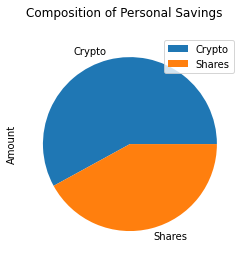

In [20]:
df_savings.plot(kind = "pie",subplots=True,title= "Composition of Personal Savings")

In [21]:
# Set ideal emergency fund
emergency_fund = monthly_income *3

# Calculate total amount of savings
total_savings = df_savings.sum().item()

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in this fund.")
if total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal!")
elif total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} away from reaching this financial goal.")

Congratulations! You have enough money in this fund.


# Part 2 - Retirement Planning

### Monte Carlo Simulation

In [22]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp('2016-05-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-11', tz='America/New_York').isoformat()

In [23]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["AGG","SPY"]

# Display sample data

stock_df=alpaca.get_barset(tickers, timeframe, start = start_date,end=end_date).df
stock_df.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2020-12-16 00:00:00-05:00  117.83  118.033  117.7610  117.97  4415156  369.82   
2020-12-17 00:00:00-05:00  118.01  118.060  117.7299  117.84  6187968  371.94   
2020-12-18 00:00:00-05:00  117.97  117.970  117.7600  117.81  3472883  370.97   
2020-12-21 00:00:00-05:00  117.92  117.960  117.7500  117.79  3645094  364.97   
2020-12-22 00:00:00-05:00  117.88  117.980  117.8250  117.96  2570686  368.21   

                                                                 
                               high       low   close    volume  
time                                                             
2020-12-16 00:00:00-05:00  371.1600  368.8676  370.14  47524603  
2020-12-17 00:00:00-05:00  372.4600  371.0500  372.21  50863245  
2020-12-18 00:00:00-05:00  371.1500  367.0200  369.13  89156141  
2020-12-21 00:00:00-05:00  378.4600  362.0300  367.93  73946581  
2020-12-22 00:00:00-05:00  368.3317  366.0300  367.22  41116443

In [29]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

mc_fiveyear=MCSimulation(portfolio_data=stock_df, weights= [0.4,0.6], num_simulation=500, num_trading_days=252*30)

# Printing the simulation input data

mc_fiveyear.portfolio_data.head()

AGG                                      \
                             open     high       low   close   volume   
time                                                                    
2020-12-16 00:00:00-05:00  117.83  118.033  117.7610  117.97  4415156   
2020-12-17 00:00:00-05:00  118.01  118.060  117.7299  117.84  6187968   
2020-12-18 00:00:00-05:00  117.97  117.970  117.7600  117.81  3472883   
2020-12-21 00:00:00-05:00  117.92  117.960  117.7500  117.79  3645094   
2020-12-22 00:00:00-05:00  117.88  117.980  117.8250  117.96  2570686   

                                           SPY                              \
                          daily_return    open      high       low   close   
time                                                                         
2020-12-16 00:00:00-05:00          NaN  369.82  371.1600  368.8676  370.14   
2020-12-17 00:00:00-05:00    -0.001102  371.94  372.4600  371.0500  372.21   
2020-12-18 00:00:00-05:00    -0.000255  370.97  371.1500  367.0200  369.13   
2020-12-21 00:00:00-05:00    -0.000170  364.97  378.4600  362.0300  367.93   
2020-12-22 00:00:00-05:00     0.001443  368.21  368.3317  366.0300  367.22   

                                                  
                             volume daily_return  
time                                              
2020-12-16 00:00:00-05:00  47524603          NaN  
2020-12-17 00:00:00-05:00  50863245     0.005592  
2020-12-18 00:00:00-05:00  89156141    -0.008275  
2020-12-21 00:00:00-05:00  73946581    -0.003251  
2020-12-22 00:00:00-05:00  41116443    -0.001930

In [30]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns

mc_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000417,0.996030,1.003020,0.990849,1.005056,1.001700,0.992590,1.004105,1.005848,1.002363,...,0.999155,1.006064,1.008492,1.001080,1.006077,0.998220,1.011276,1.001147,1.006122,1.002109
2,1.008250,0.996604,1.005818,0.987409,1.004983,1.000983,0.986760,1.018619,1.008279,0.999059,...,0.995080,1.003751,1.016965,0.998551,0.997974,0.999364,1.017847,1.001724,1.003453,1.006584
3,1.011750,0.995790,1.005823,0.991618,1.014643,1.001485,0.983310,1.013265,1.011465,1.001737,...,0.986626,0.996171,1.012438,0.999494,0.996716,0.997223,1.009543,1.002111,1.015702,1.000000
4,1.011461,1.005374,1.015623,0.995074,1.010246,1.001235,0.989271,1.019901,1.014732,1.005824,...,0.989270,0.993711,1.010608,0.999449,0.991043,1.001601,1.016959,0.996433,1.017780,0.992479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,124.123232,68.300332,52.992785,24.803904,72.589649,154.814599,62.929821,103.138050,54.894279,150.849601,...,46.803538,86.918750,110.186398,58.286324,85.410946,75.381806,32.154766,68.964549,65.571216,65.472560
7557,125.049836,68.197354,52.869781,24.932975,72.915663,155.805217,62.706512,103.205944,54.845599,149.458990,...,46.953567,87.645137,110.064970,57.940198,86.865489,76.119503,32.612349,68.956044,65.420612,65.675169
7558,124.635234,68.562063,52.769788,24.661273,72.946277,155.482040,63.060160,103.229952,54.922769,148.577905,...,47.083224,88.190645,109.876310,58.060043,87.523155,76.047856,32.517704,69.037485,65.187947,65.922633
7559,124.717785,68.285173,53.132069,24.774379,73.040480,155.112338,62.889796,102.656452,55.385190,148.466935,...,47.130286,88.140718,110.193527,58.408976,86.955031,75.259613,32.393207,69.189424,65.193276,65.879575


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

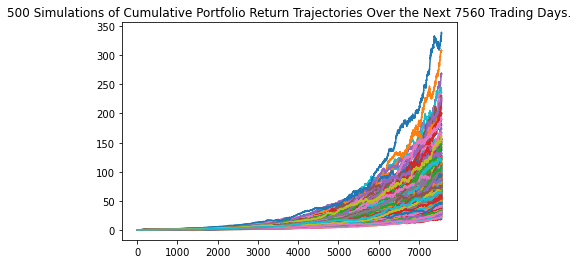

In [31]:
# Plot simulation outcomes

mc_fiveyear.plot_simulation()

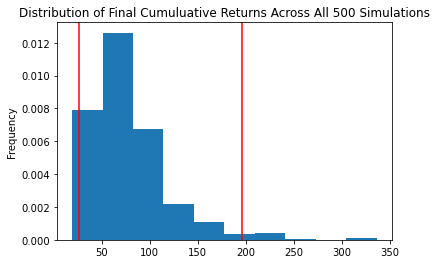

In [32]:
# Plot probability distribution and confidence intervals

dist_plot=mc_fiveyear.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats=mc_fiveyear.summarize_cumulative_return()

# Print summary statistics
sum_stats


count           500.000000
mean             77.824312
std              41.750719
min              19.154321
25%              50.882676
50%              69.420423
75%              92.654487
max             336.464721
95% CI Lower     26.793018
95% CI Upper    195.994815
Name: 7560, dtype: float64

In [37]:
# Set initial investment
initial_investment = 20000
ci_lower=round(sum_stats[8]*initial_investment)
ci_upper=round(sum_stats[9]*initial_investment)
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $535860 and $3919896


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a 50% increase in the initial investment.

In [38]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(sum_stats[8]*initial_investment)
ci_upper=round(sum_stats[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $803791 and $5879844


## Optional Challenge - Early Retirement

### Five Years Retirement Option

In [41]:
# To allow for quicker work during the Monte Carlo simulation, start out by running 100 simulations for one year of returns

early_retirement=MCSimulation(portfolio_data=stock_df, weights= [0.4,0.6], num_simulation=100, num_trading_days=252)
early_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001977,1.000043,1.001351,0.997423,0.994255,1.000769,1.002675,0.997356,0.998764,1.008484,...,1.004326,1.004388,0.997058,0.997040,0.999602,1.003601,1.000414,0.997967,1.002345,1.003407
2,1.006219,1.009947,1.002647,1.007796,0.997884,1.008456,0.999187,1.001809,0.991803,1.005849,...,1.004720,1.000996,0.993152,0.999909,0.997196,1.012024,1.001266,0.995573,0.997939,1.004972
3,1.003235,1.003023,1.001552,1.008405,0.999491,1.010870,1.001660,1.012706,0.999969,1.000431,...,1.010518,1.002746,0.987873,1.005234,0.997145,1.016451,1.001933,1.002936,0.994759,1.004686
4,0.990295,1.005434,0.990403,1.007442,1.005811,1.011020,1.003954,1.003664,0.991881,1.007347,...,1.015914,1.006009,0.989907,1.008948,1.000717,1.024981,0.995256,1.015819,0.990917,1.009139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.205957,1.150801,1.180278,1.112347,1.074282,1.159453,1.227651,1.094048,1.150851,1.116968,...,1.180613,1.320166,1.199554,1.213500,1.209613,1.124551,1.146722,1.276364,1.119488,1.390877
249,1.216805,1.152591,1.188104,1.119896,1.070126,1.156045,1.226254,1.095947,1.145735,1.112985,...,1.175642,1.317420,1.198545,1.226558,1.202031,1.128087,1.143682,1.291394,1.109258,1.376234
250,1.212938,1.145390,1.194347,1.117121,1.066203,1.160486,1.222946,1.098604,1.141012,1.107712,...,1.180118,1.322905,1.204443,1.230230,1.209235,1.121374,1.150002,1.285170,1.109236,1.369568
251,1.214130,1.153041,1.191093,1.131311,1.073895,1.164383,1.218449,1.099112,1.144085,1.109146,...,1.182524,1.319654,1.200408,1.219205,1.207461,1.119600,1.146349,1.290568,1.105739,1.373755


In [42]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns

early_retirement_five_years=MCSimulation(portfolio_data=stock_df, weights= [0.4,0.6], num_simulation=500, num_trading_days=252*5)
early_retirement_five_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003291,1.000032,1.003145,1.007463,0.992321,1.009827,0.994215,1.005366,0.988961,0.999051,...,0.993804,0.996305,1.004320,1.006966,0.998353,1.000798,0.991931,1.003275,1.006218,1.004680
2,0.996179,1.003506,1.000677,1.002094,0.988492,1.013553,0.993920,1.009071,0.993444,1.006580,...,0.994731,1.002627,1.003968,1.002556,0.999488,1.000155,0.997823,1.008441,1.006916,1.003762
3,0.991347,1.000317,0.997940,0.996115,0.988735,1.013319,0.996590,1.019644,0.990756,1.012178,...,0.989345,1.000163,1.001927,0.999989,1.002301,1.000878,1.000218,1.008080,1.004828,1.001439
4,0.997093,0.993866,1.003707,0.993325,0.990828,1.016824,0.993150,1.022825,0.991698,1.004754,...,0.997111,1.003364,0.994389,1.013992,1.000850,0.999127,0.998234,1.005090,1.005097,0.997288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.928468,1.589480,2.215694,1.695081,2.124076,1.644762,2.487521,1.778272,1.664529,1.911935,...,1.387322,2.350827,2.299485,1.896265,1.564848,1.921141,2.076763,1.961561,2.461634,1.523567
1257,1.923231,1.615980,2.209564,1.680736,2.130979,1.642302,2.494617,1.774104,1.668108,1.913098,...,1.377352,2.358057,2.303644,1.912974,1.552365,1.938602,2.075767,1.947192,2.464243,1.523064
1258,1.918692,1.607861,2.229425,1.676856,2.121420,1.639237,2.478857,1.789205,1.657556,1.916364,...,1.377594,2.366623,2.327952,1.915802,1.546629,1.931886,2.093032,1.951578,2.470732,1.511082
1259,1.909197,1.617128,2.230185,1.674421,2.110948,1.638889,2.500435,1.789458,1.660644,1.925467,...,1.373704,2.387040,2.348886,1.925188,1.538888,1.935484,2.077695,1.936813,2.506354,1.518552


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

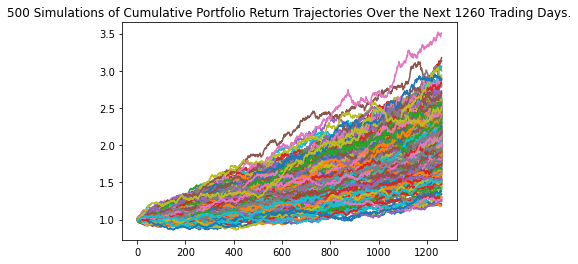

In [43]:
# Plot simulation outcomes

early_retirement_five_years.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

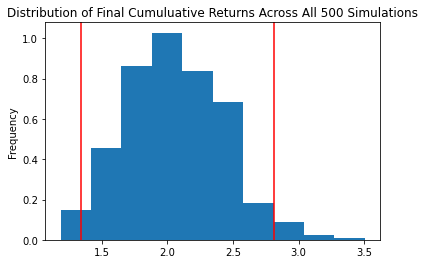

In [44]:
# Plot probability distribution and confidence intervals

early_retirement_five_years.plot_distribution()

In [47]:
five_years_sum=early_retirement_five_years.summarize_cumulative_return()
five_years_sum

count           500.000000
mean              2.048209
std               0.368111
min               1.187776
25%               1.795417
50%               2.043282
75%               2.303244
max               3.503382
95% CI Lower      1.342381
95% CI Upper      2.813172
Name: 1260, dtype: float64

In [48]:
# Set initial investment
initial_investment= 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five=round(five_years_sum[8]*initial_investment)
ci_upper_five=round(five_years_sum[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $80543 and $168790


### Ten Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_years_retirement=MCSimulation(portfolio_data=stock_df, weights= [0.4,0.6], num_simulation=500, num_trading_days=252*10)

# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_years_retirement.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003036,1.002267,0.998824,1.004199,1.004955,0.998114,1.001957,1.000366,0.997516,1.004989,...,1.002747,0.996427,0.996095,1.008041,1.005072,0.994775,0.997757,1.004881,0.994343,1.000079
2,1.000520,1.009324,0.994706,1.014313,1.009836,0.997184,1.009611,1.004193,0.997227,1.008335,...,1.011755,0.997414,0.994642,1.002068,1.005711,1.002673,0.993742,1.014016,0.997619,0.994563
3,0.997310,1.014659,0.994576,1.020292,1.009876,1.005217,1.014433,1.008015,1.001920,1.005706,...,1.013274,0.996552,0.993214,0.999643,1.005462,0.999125,0.992781,1.018180,0.998822,1.001457
4,0.990266,1.020918,1.002802,1.019890,1.011254,1.003130,1.018270,1.003612,1.002983,1.016798,...,1.010248,0.992423,0.997583,1.005115,0.997112,1.004390,0.989164,1.021052,0.999929,1.003127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.662262,3.406440,4.181311,3.379397,4.397296,5.043647,3.484615,4.051621,3.401244,4.899845,...,6.622687,4.947611,3.488075,3.308950,3.510056,3.354941,2.511499,4.540930,6.354660,5.494848
2517,3.666393,3.421285,4.177461,3.352108,4.372915,5.079444,3.520146,4.038401,3.420889,4.873767,...,6.639051,4.904025,3.522148,3.331690,3.507732,3.363543,2.505141,4.580460,6.396109,5.478926
2518,3.669211,3.405991,4.187743,3.333712,4.417499,5.085954,3.512319,4.052327,3.407318,4.825232,...,6.610703,4.913202,3.504964,3.358016,3.504178,3.368709,2.513311,4.582480,6.403007,5.476227
2519,3.699500,3.421450,4.211285,3.340341,4.414522,5.094507,3.528377,4.103978,3.427107,4.822252,...,6.643193,4.945227,3.502003,3.342162,3.502895,3.382762,2.516388,4.597894,6.387167,5.449804


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

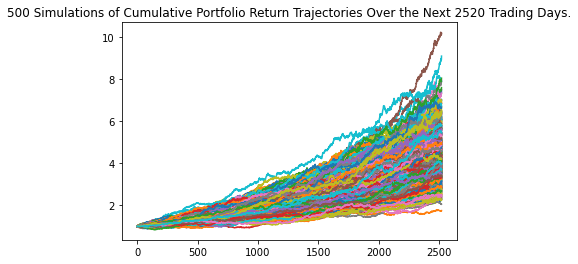

In [50]:
# Plot simulation outcomes

ten_years_retirement.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

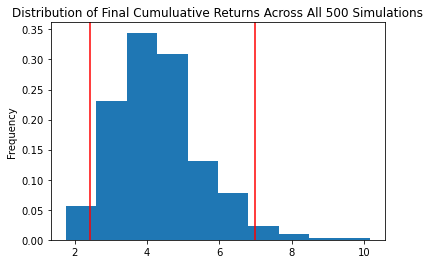

In [51]:
ten_years_retirement.plot_distribution()

In [54]:
# Print summary statistics

ten_years_results=ten_years_retirement.summarize_cumulative_return()
ten_years_results

count           500.000000
mean              4.314692
std               1.201583
min               1.752192
25%               3.470048
50%               4.185739
75%               4.958010
max              10.170327
95% CI Lower      2.425442
95% CI Upper      6.972118
Name: 2520, dtype: float64

In [56]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten=round(ten_years_results[8]*initial_investment)
ci_upper_ten=round(ten_years_results[9]*initial_investment)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}") 

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $145527 and $418327
